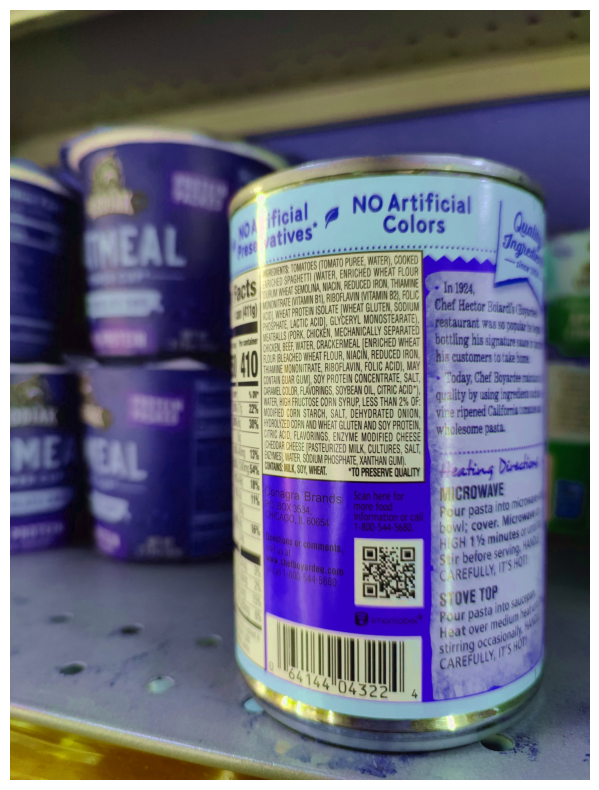

In [20]:
import albumentations as A
import matplotlib.pyplot as plt
import random
from PIL import Image
import cv2
import numpy as np
from pathlib import Path


def visualize(image):
    
    """
    Display and save an image using matplotlib and OpenCV.

    Parameters:
        image (numpy.ndarray): The image to be visualized and saved.
    """
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)
    cv2.imwrite("/home/featurize/work/OCR_exper/image.png",image)
    
def generate_random_odd_number(min_value, max_value):
    """
    Generate a random odd number within a specified range.

    Parameters:
        min_value (int): The minimum value in the range.
        max_value (int): The maximum value in the range.

    Returns:
        int: A random odd number within the specified range.
    """
    number = random.randint(min_value, max_value)

    if number % 2 == 0:
        number = number + 1 if number < max_value else number - 1
    return number

def get_transformed_image(image_path, seed):
    """
    Apply various augmentations to an image for preprocessing, particularly useful for OCR tasks.

    Parameters:
        image_path (str): Path to the image file.
        seed (int): Seed value for random number generation to ensure reproducibility.

    Returns:
        numpy.ndarray: The transformed (augmented) image.
    """
    random.seed(seed)
    np.random.seed(seed)
    
    
    image = cv2.imread(image_path)
    if image is None:
        print(f"{image_path} is None")
        return
    width, height = image.shape[0], image.shape[1]
    patch_size = int(np.min([width, height]) / 1.3)

    transform = A.Compose([
        
        A.OneOf(
            [
                # A.RandomCrop(height = patch_size, width = patch_size),
                A.CenterCrop(height= patch_size, width= patch_size),
            ],
            p = 0.4
        ),
        A.CLAHE(clip_limit=5, p = 0.2),
        A.MotionBlur(blur_limit=generate_random_odd_number(9, 27), p=0.8),
        A.RandomBrightnessContrast(brightness_limit=0.7, contrast_limit=0.7, p=1),
        # A.ShiftScaleRotate(shift_limit=0, scale_limit=0.2, rotate_limit=180, p=0.8),
        A.HueSaturationValue(p = 0.6)
        
    ])
    
    
    augmented_image = transform(image = image)["image"]
    return augmented_image

augmented_image = get_transformed_image("/home/featurize/work/OCR_exper/JPEG_Dataset/36.jpeg", 5)

visualize(augmented_image)